In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.utils import shuffle

In [3]:
def getData(balance_ones = True , Ntest= 1000):
  X =[]
  Y =[]
  first = True
  for line in open('fer/fer2013.csv'):
    if first:
      first = False
    else:
      row = line.split(',')
      Y.append(int(row[0]))
      X.append([int(p) for p in row[1].split()])
  
  X,Y = np.array(X)/255.0 , np.array(Y)
  X , Y = shuffle(X,Y)
  Xtrain , Ytrain = X[:-Ntest] , Y[:-Ntest]
  Xvalid , Yvalid = X[-Ntest:] , Y[-Ntest:]
  if balance_ones:
    X0,Y0 = Xtrain[Ytrain!=1, :] , Ytrain[Ytrain!=1]
    X1 = Xtrain[Ytrain==1, :]
    X1 = np.repeat(X1 , 9 , axis=0)
    Xtrain = np.vstack([X0,X1])
    Ytrain = np.concatenate((Y0 , [1]*len(X1)))
    return Xtrain , Ytrain , Xvalid , Yvalid

In [4]:
def getImageData():
  Xtrain , Ytrain , Xvalid , Yvalid = getData()
  N,D = Xtrain.shape
  d = int(np.sqrt(D))
  Xtrain = Xtrain.reshape(-1,d,d,1)
  Xvalid = Xvalid.reshape(-1,d,d,1)
  return Xtrain , Ytrain , Xvalid , Yvalid

In [5]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(48, 48, 1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(7, activation='softmax')])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

In [7]:
Xtrain , Ytrain , Xvalid , Yvalid = getImageData()

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
modl = model.fit(x=Xtrain, y=Ytrain, epochs=15)

Epoch 1/15
1223/1223 [==============================] - 39s 32ms/step - loss: 1.6400 - accuracy: 0.3630
Epoch 2/15
1223/1223 [==============================] - 40s 32ms/step - loss: 1.2850 - accuracy: 0.5135
Epoch 3/15
1223/1223 [==============================] - 39s 32ms/step - loss: 1.1047 - accuracy: 0.5840
Epoch 4/15
1223/1223 [==============================] - 38s 31ms/step - loss: 0.9928 - accuracy: 0.6243
Epoch 5/15
1223/1223 [==============================] - 39s 32ms/step - loss: 0.9099 - accuracy: 0.6571
Epoch 6/15
1223/1223 [==============================] - 37s 30ms/step - loss: 0.8358 - accuracy: 0.6879
Epoch 7/15
1223/1223 [==============================] - 39s 32ms/step - loss: 0.7590 - accuracy: 0.7172
Epoch 8/15
1223/1223 [==============================] - 37s 30ms/step - loss: 0.6785 - accuracy: 0.7477
Epoch 9/15
1223/1223 [==============================] - 43s 35ms/step - loss: 0.5996 - accuracy: 0.7781
Epoch 10/15
1223/1223 [==============================] - 44s 36m

In [10]:
import cv2

img = cv2.imread('D:/Downloads/human.jfif')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [11]:
from tensorflow.keras.preprocessing import image
gray = cv2.resize(gray, (48,48))
x = image.img_to_array(gray)
x = x/255
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])

[1.3228523e-03 1.6258694e-11 7.5452757e-01 1.8056437e-09 2.0092340e-01
 1.1869389e-02 3.1356856e-02]


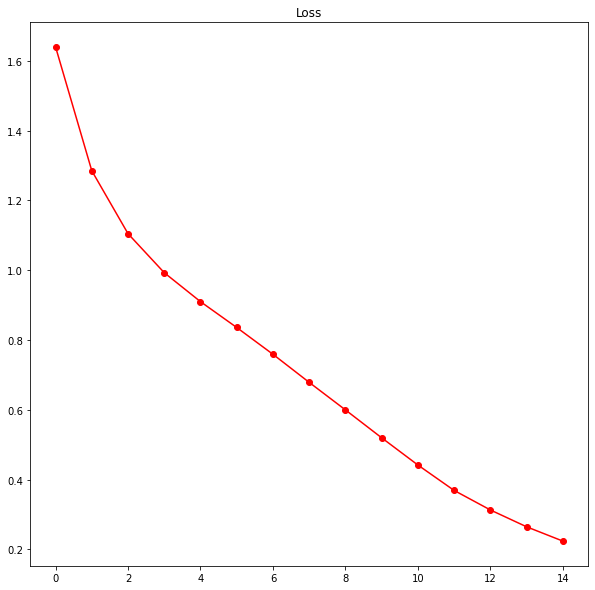

In [22]:
fig = plt.figure(figsize= (10,10))
plt.plot(modl.history['loss'], 'ro-')
plt.title('Loss')
plt.show()

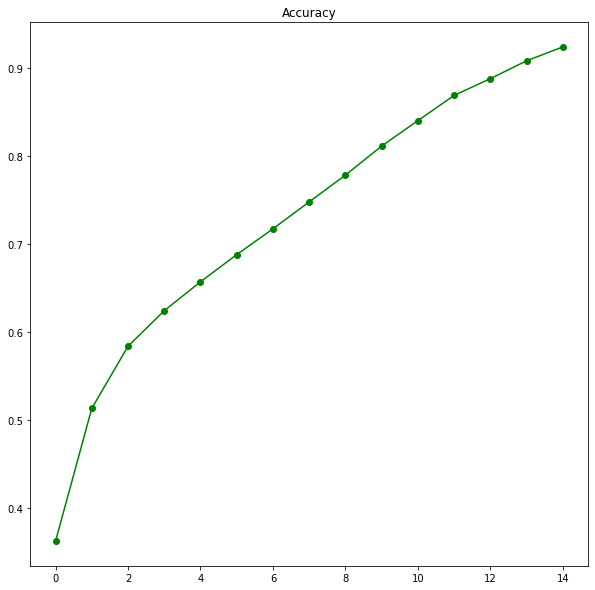

In [24]:
fig = plt.figure(figsize=(10, 10))
plt.plot(modl.history['accuracy'], 'go-')
plt.title('Accuracy')
plt.show()